In [12]:
import numpy as np
import scipy.stats as sp
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.proportion import proportions_ztest
from scipy import stats
from sklearn.preprocessing import scale, minmax_scale,robust_scale

In [5]:
df_raw=pd.read_csv('FITNESS_결측.csv',engine='python')
df_raw.head()

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,Donna,여성,42,40대,68.15,59.571,8.17,166,40,172
1,Gracie,NaN,38,30대,81.87,60.055,8.63,170,48,186
2,Luanne,여성,43,40대,85.84,54.297,8.65,156,45,168
3,Mimi,여성,50,50대,70.87,54.625,8.92,146,48,155
4,Chris,남성,49,40대,NaN,49.156,8.95,180,44,185


In [7]:
df_raw.isnull().head()


,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,True,False,False,False,False,False


In [8]:
df_raw.isna().head()

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,True,False,False,False,False,False


In [9]:
df_raw.isnull().sum()

NAME        0
GENDER      1
AGE         0
AGEGROUP    0
WEIGHT      2
OXY         0
RUNTIME     0
RUNPULSE    0
RSTPULSE    0
MAXPULSE    0
dtype: int64

In [11]:
df_raw['GENDER'].fillna('여성',inplace=True)
df_raw.head()

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,Donna,여성,42,40대,68.15,59.571,8.17,166,40,172
1,Gracie,여성,38,30대,81.87,60.055,8.63,170,48,186
2,Luanne,여성,43,40대,85.84,54.297,8.65,156,45,168
3,Mimi,여성,50,50대,70.87,54.625,8.92,146,48,155
4,Chris,남성,49,40대,NaN,49.156,8.95,180,44,185


In [13]:
df_raw.groupby('GENDER')['WEIGHT'].agg('mean')

GENDER
남성    82.433077
여성    72.908750
Name: WEIGHT, dtype: float64

In [15]:
df_raw['WEIGHT']=df_raw['WEIGHT'].fillna(df_raw.groupby('GENDER')['WEIGHT'].transform('mean')).round(3)
df_raw.head()

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,Donna,여성,42,40대,68.150,59.571,8.17,166,40,172
1,Gracie,여성,38,30대,81.870,60.055,8.63,170,48,186
2,Luanne,여성,43,40대,85.840,54.297,8.65,156,45,168
3,Mimi,여성,50,50대,70.870,54.625,8.92,146,48,155
4,Chris,남성,49,40대,82.433,49.156,8.95,180,44,185


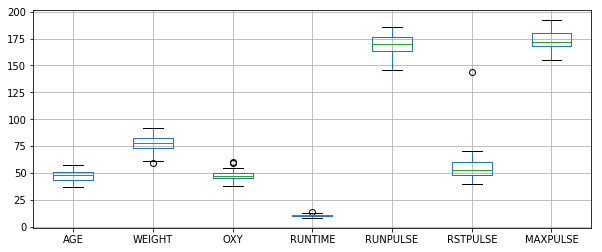

In [16]:
df_raw.boxplot(figsize=(10,4))

In [18]:
df_raw['RSTPULSE']>=100

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28     True
29    False
30    False
Name: RSTPULSE, dtype: bool

In [22]:
df_raw[(df_raw['RSTPULSE']>=100)]

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
28,Steve,남성,54,50대,91.63,39.203,12.88,168,144,172


In [24]:
df_fitness=df_raw[(df_raw['RSTPULSE']<100)]
df_fitness

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,Donna,여성,42,40대,68.150,59.571,8.17,166,40,172
1,Gracie,여성,38,30대,81.870,60.055,8.63,170,48,186
2,Luanne,여성,43,40대,85.840,54.297,8.65,156,45,168
3,Mimi,여성,50,50대,70.870,54.625,8.92,146,48,155
4,Chris,남성,49,40대,82.433,49.156,8.95,180,44,185
5,Allen,남성,38,30대,89.020,49.874,9.22,178,55,180
6,Nancy,여성,49,40대,76.320,48.673,9.40,186,56,188
7,Patty,여성,52,50대,76.320,45.441,9.63,164,48,166
8,Suzanne,여성,57,50대,59.080,50.545,9.93,148,49,155
9,Teresa,여성,51,50대,77.910,46.672,10.00,162,48,168


In [26]:
df_fitness_num=df_fitness.select_dtypes(exclude='object')
df_fitness_num.head()

,AGE,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,42,68.150,59.571,8.17,166,40,172
1,38,81.870,60.055,8.63,170,48,186
2,43,85.840,54.297,8.65,156,45,168
3,50,70.870,54.625,8.92,146,48,155
4,49,82.433,49.156,8.95,180,44,185


In [27]:
df_fitness_char=df_fitness.select_dtypes(include='object')
df_fitness_char.head()

,NAME,GENDER,AGEGROUP
0,Donna,여성,40대
1,Gracie,여성,30대
2,Luanne,여성,40대
3,Mimi,여성,50대
4,Chris,남성,40대


In [29]:
df_scale_std=scale(df_fitness_num)
df_scale_std=pd.DataFrame(df_scale_std,columns=df_fitness_num.columns)
df_scale_std.head()

,AGE,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,-0.805985,-1.119445,2.334717,-1.771826,-0.361066,-1.856653,-0.200185
1,-1.506841,0.606869,2.429494,-1.423469,0.029276,-0.777726,1.328503
2,-0.630771,1.106393,1.301962,-1.408323,-1.336919,-1.182324,-0.636953
3,0.595728,-0.777202,1.366191,-1.203852,-2.312773,-0.777726,-2.056450
4,0.420514,0.677708,0.295251,-1.181133,1.005129,-1.317190,1.219311


In [30]:
df_scale_minmax=minmax_scale(df_fitness_num)
df_scale_minmax=pd.DataFrame(df_scale_minmax,columns=df_fitness_num.columns)
df_scale_minmax.head()

,AGE,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,0.25,0.278648,0.978647,0.000000,0.50,0.000000,0.459459
1,0.05,0.700154,1.000000,0.078498,0.60,0.266667,0.837838
2,0.30,0.822120,0.745974,0.081911,0.25,0.166667,0.351351
3,0.65,0.362212,0.760445,0.127986,0.00,0.266667,0.000000
4,0.60,0.717450,0.519169,0.133106,0.85,0.133333,0.810811


In [32]:
df_scale_robust=robust_scale(df_fitness_num)
df_scale_robust=pd.DataFrame(df_scale_robust,columns=df_fitness_num.columns)
df_scale_robust.head()

,AGE,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,-0.6875,-0.937433,2.463797,-1.535284,-0.296296,-1.162791,0.000000
1,-1.1875,0.534986,2.558834,-1.218589,0.000000,-0.418605,1.166667
2,-0.5625,0.961043,1.428207,-1.204819,-1.037037,-0.697674,-0.333333
3,0.3125,-0.645525,1.492612,-1.018933,-1.777778,-0.418605,-1.416667
4,0.1875,0.595407,0.418733,-0.998279,0.740741,-0.790698,1.083333


In [35]:
df_rstpulse=pd.DataFrame()
df_rstpulse['Raw']=df_fitness_num['RSTPULSE']
df_rstpulse['Standard']=df_scale_std['RSTPULSE']
df_rstpulse['MinMax']=df_scale_minmax['RSTPULSE']
df_rstpulse['Robust']=df_scale_robust['RSTPULSE']
df_rstpulse.head().round(3)

,Raw,Standard,MinMax,Robust
0,40,-1.857,0.000,-1.163
1,48,-0.778,0.267,-0.419
2,45,-1.182,0.167,-0.698
3,48,-0.778,0.267,-0.419
4,44,-1.317,0.133,-0.791


In [36]:
df_rstpulse.describe().round(3)

,Raw,Standard,MinMax,Robust
count,30.000,29.000,29.000,29.000
mean,53.767,-0.043,0.448,0.088
std,7.542,1.007,0.249,0.695
min,40.000,-1.857,0.000,-1.163
25%,48.000,-0.778,0.267,-0.419
50%,52.500,-0.238,0.400,-0.047
75%,58.750,0.571,0.600,0.512
max,70.000,2.189,1.000,1.628


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002BA98A0EF98>,
      dtype=object)

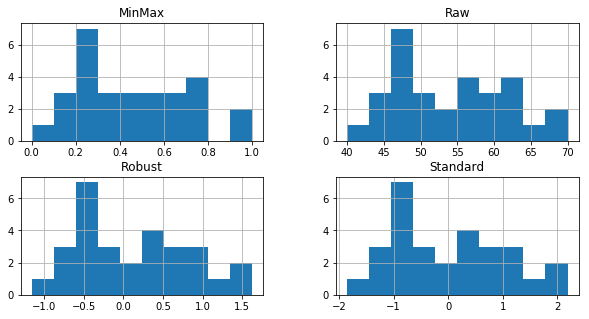

In [37]:
df_rstpulse[['Raw','Standard','MinMax','Robust']].hist(figsize=(10,5))

In [39]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rc('font',family='Malgun Gothic')


In [41]:
df_f=pd.read_csv('FITNESS-원본.csv',engine='python')
df_f.head()

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,Donna,여성,42,40대,68.15,59.571,8.17,166,40,172
1,Gracie,여성,38,30대,81.87,60.055,8.63,170,48,186
2,Luanne,여성,43,40대,85.84,54.297,8.65,156,45,168
3,Mimi,여성,50,50대,70.87,54.625,8.92,146,48,155
4,Chris,남성,49,40대,81.42,49.156,8.95,180,44,185


In [82]:
df_currency=pd.read_csv('환율.csv',engine='python',parse_dates=['APPL_DATE'])
df_currency.head()

,CURRENCY,APPL_DATE,STD_RATE,USD_CONV_DATE
0,CNY,2016-01-01,181.48,0.1541
1,JPY,2016-01-01,976.99,0.8294
2,USD,2016-01-01,1178.00,1.0000
3,CNY,2016-01-02,181.48,0.1541
4,JPY,2016-01-02,976.99,0.8294


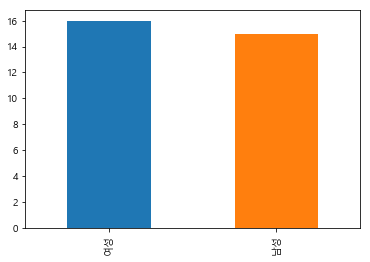

In [44]:
df_count=df_f['GENDER'].value_counts()
df_count.plot.bar()
#여성의 수가 더 많다.

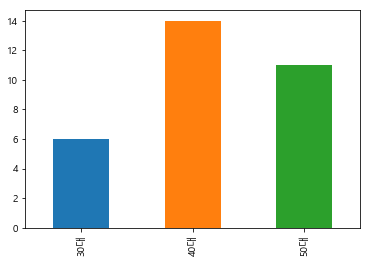

In [45]:
df_count=df_f['AGEGROUP'].value_counts()
df_count.sort_index(inplace=True)
df_count.plot.bar()
#40대가 제일 많다.

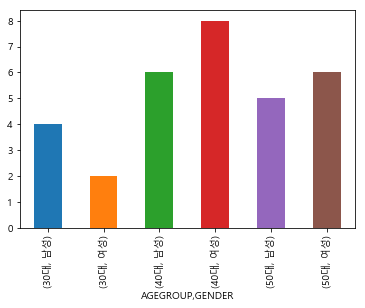

In [92]:
df_groupby_total=df_f.groupby(['AGEGROUP','GENDER'],as_index=False).size()
df_groupby_total.plot.bar()
#40대 여성이 제일 많다. 30대 여성이 제일 적다.

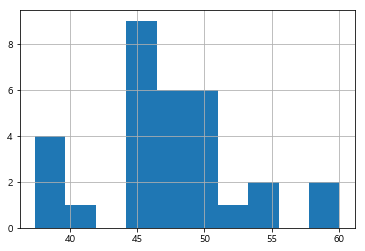

In [47]:
df_f['OXY'].hist()
#45~50대 사이의 사람이 oxy가 높다.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002BA9AE95E10>,
      dtype=object)

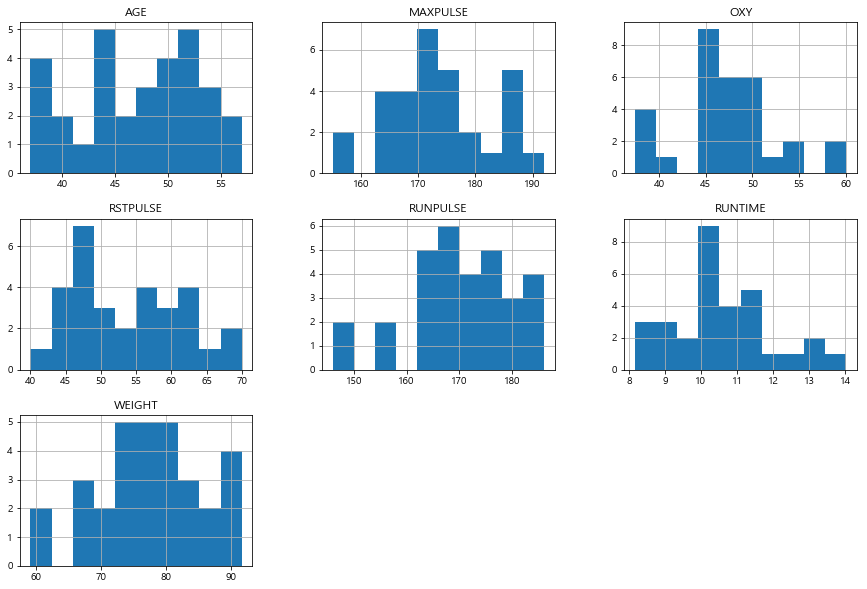

In [63]:
df_f.hist(figsize=(15,10))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002BAA14D6358>,
      dtype=object)

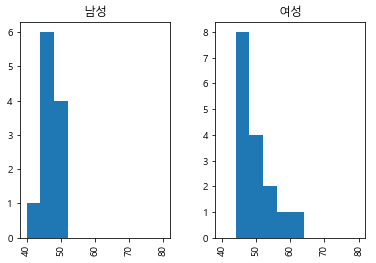

In [94]:
df_f.hist(column='OXY',by='GENDER',range=(40,80))
#여성의 나이가 증가 할 수록 oxy 가 감소한다.

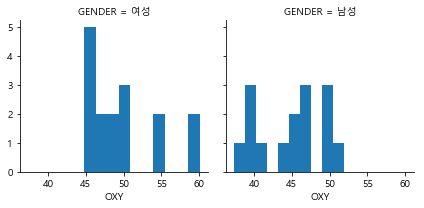

In [69]:
grid=sns.FacetGrid(df_f,col='GENDER')
grid.map(plt.hist,'OXY')
#45세의 여성의 oxy가 가장 크고 나머지는 비슷하다.

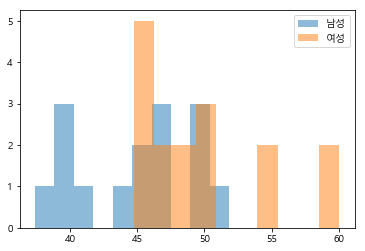

In [96]:
plt.hist(df_f[df_f['GENDER']=='남성']['OXY'],label='남성',alpha=0.5)
plt.hist(df_f[df_f['GENDER']=='여성']['OXY'],label='여성',alpha=0.5)
plt.legend()
#남성은 주로 40~50대 사이에 분포하고 있으며 여성은 4~60대 사이에 분포하고 있다. 

(array([4., 1., 0., 9., 6., 6., 1., 2., 0., 2.]),
 array([37.388 , 39.6547, 41.9214, 44.1881, 46.4548, 48.7215, 50.9882,
        53.2549, 55.5216, 57.7883, 60.055 ]),
 <a list of 10 Patch objects>)

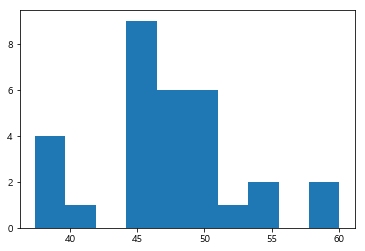

In [58]:
plt.hist(x='OXY',data=df_f)
#45~50세의 oxy가 분포가 밀집되어 있다.

(array([1., 0., 3., 0., 1., 0., 0., 0., 0., 3., 4., 2., 2., 3., 1., 2., 1.,
        3., 0., 1., 0., 0., 2., 0., 0., 0., 0., 0., 0., 2.]),
 array([37.388     , 38.14356667, 38.89913333, 39.6547    , 40.41026667,
        41.16583333, 41.9214    , 42.67696667, 43.43253333, 44.1881    ,
        44.94366667, 45.69923333, 46.4548    , 47.21036667, 47.96593333,
        48.7215    , 49.47706667, 50.23263333, 50.9882    , 51.74376667,
        52.49933333, 53.2549    , 54.01046667, 54.76603333, 55.5216    ,
        56.27716667, 57.03273333, 57.7883    , 58.54386667, 59.29943333,
        60.055     ]),
 <a list of 30 Patch objects>)

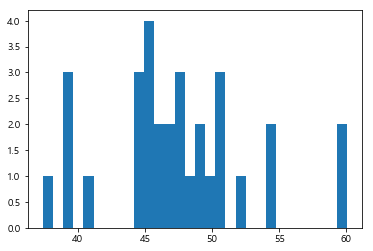

In [80]:
plt.hist(x='OXY',data=df_f,bins=30)
# 45~50세의 oxy가 밀집되어 있다.

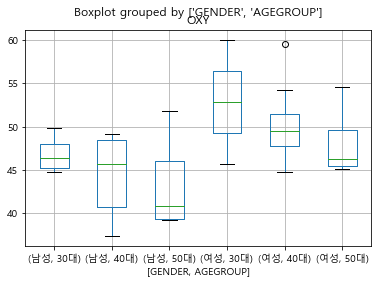

In [70]:
df_f.boxplot(column='OXY',by=['GENDER','AGEGROUP'])

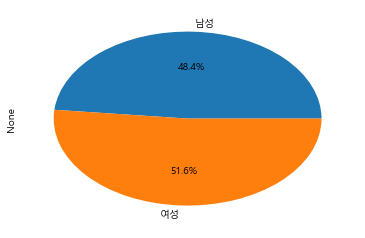

In [72]:
df_count=df_f.groupby(['GENDER']).size()
df_count.plot.pie(y='OXY',autopct='%.1f%%')

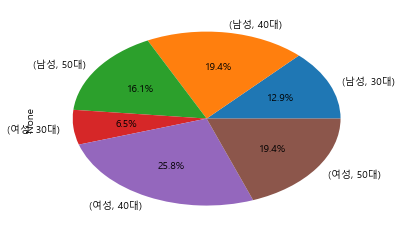

In [73]:
df_count=df_f.groupby(['GENDER','AGEGROUP']).size()
df_count.plot.pie(y='OXY',autopct='%.1f%%')

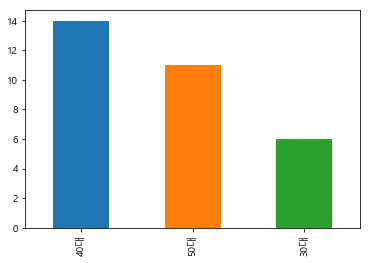

In [91]:
df_count=df_f['AGEGROUP'].value_counts()
df_count.plot.bar()